# Predicting Heart Disease using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of heart disease **classification**.

For example, given a person's health characteristics, we're going to build a model to predict whether or not they have heart disease.

It is intended to be an end-to-end example of what a data science and machine learning **proof of concept** might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**binary classification**). 

If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

We'll start with the heart disease dataset we've worked on in previous modules and we'll approach the problem following the machine learning modelling framework.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/ml101-6-step-ml-framework-tools.png?raw=true" width=500/> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework |

More specifically, we'll look at the following topics.

| Step | What we'll cover |
|:-----|:-----|
| **Exploratory data analysis (EDA)** | The process of going through a dataset and discovering more about it. |
| **Model training**  | Create model(s) to learn to predict a target variable based on other variables. |
| **Model evaluation** | Evaluating a model's predictions using problem-specific evaluation metrics. |
| **Model comparison** | Comparing several different models to find the best one. |
| **Model hyperparameter tuning** | Once we've found a good model, can we tweak its hyperparameters to improve it? |
| **Feature importance** | Since we're predicting the presence of heart disease, are there some features/characteristics that are more important for prediction? |
| **Cross-validation** | If we do build a good model, can we be sure it will work on unseen data? |
| **Reporting what we've found** | If we had to present our work, what would we show someone? |

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/images/supervised-projects-6-step-ml-framework-tools-highlight.png?raw=true" width=750/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy. 

You'll also be able to describe which parameters are more indicative than others, for example, sex may be more important than age.

### 1.Problem Definition:
In a Statement:
>Given clinical parameters about a patient,can we predict whether or not they have heart disease 

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

we're going to use pandas ,matplotlib and numpy for data anaylsis and manipulation

In [1]:
#import all the tools we need

#regular EDA (exploratory data analysis) and plotting libraries
import numpy as  np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# we want to plots to appear inside the notbook
%matplotlib inline 
#import models form scikit-learn 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics  import RocCurveDisplay

**Load Data**

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #rows and columns

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal is here to find out more about the data and become a subject exper on the dataset you're working with
* what questions your are trying solve?
* what  kind of data do we have and how do we treat different types?
* what's missing from the data and how do you do with it?
* where are the outliers and why should you care about  them ?
* how can you add,change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

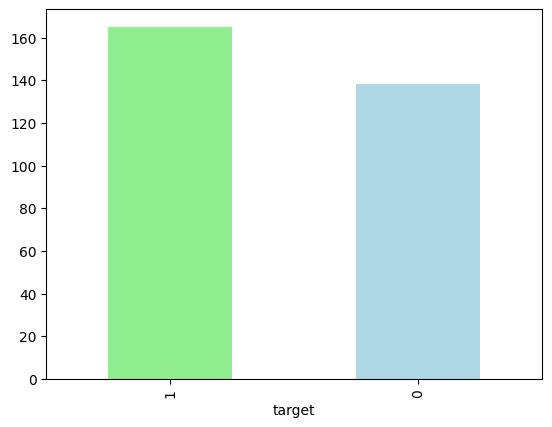

In [6]:
df["target"].value_counts().plot(
    kind="bar", color=["lightgreen", "lightblue"]);

In [7]:
import matplotlib

# Dictionary of named colors
print(matplotlib.colors.get_named_colors_mapping().keys())

dict_keys(['xkcd:cloudy blue', 'xkcd:dark pastel green', 'xkcd:dust', 'xkcd:electric lime', 'xkcd:fresh green', 'xkcd:light eggplant', 'xkcd:nasty green', 'xkcd:really light blue', 'xkcd:tea', 'xkcd:warm purple', 'xkcd:yellowish tan', 'xkcd:cement', 'xkcd:dark grass green', 'xkcd:dusty teal', 'xkcd:grey teal', 'xkcd:macaroni and cheese', 'xkcd:pinkish tan', 'xkcd:spruce', 'xkcd:strong blue', 'xkcd:toxic green', 'xkcd:windows blue', 'xkcd:blue blue', 'xkcd:blue with a hint of purple', 'xkcd:booger', 'xkcd:bright sea green', 'xkcd:dark green blue', 'xkcd:deep turquoise', 'xkcd:green teal', 'xkcd:strong pink', 'xkcd:bland', 'xkcd:deep aqua', 'xkcd:lavender pink', 'xkcd:light moss green', 'xkcd:light seafoam green', 'xkcd:olive yellow', 'xkcd:pig pink', 'xkcd:deep lilac', 'xkcd:desert', 'xkcd:dusty lavender', 'xkcd:purpley grey', 'xkcd:purply', 'xkcd:candy pink', 'xkcd:light pastel green', 'xkcd:boring green', 'xkcd:kiwi green', 'xkcd:light grey green', 'xkcd:orange pink', 'xkcd:tea green'

In [8]:
#to get different information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#other way to check that our data consists of null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex


In [11]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [12]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


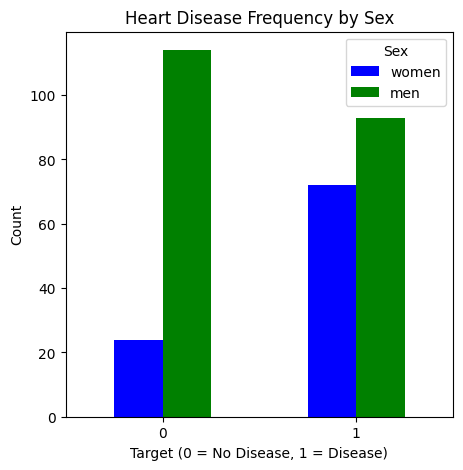

In [13]:
#create a plot of cross tab

# Create crosstab
ct = pd.crosstab(df.target, df.sex)

# Rename columns: 0 → women, 1 → men
ct = ct.rename(columns={0: "women", 1: "men"})

# Plot
ct.plot(kind="bar", color=["blue", "green"],figsize=(5,5))

plt.title("Heart Disease Frequency by Sex")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Sex")
plt.show()

In [14]:
df.thalach.value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

### Age Vs Max Heart Rate for Heart Disease


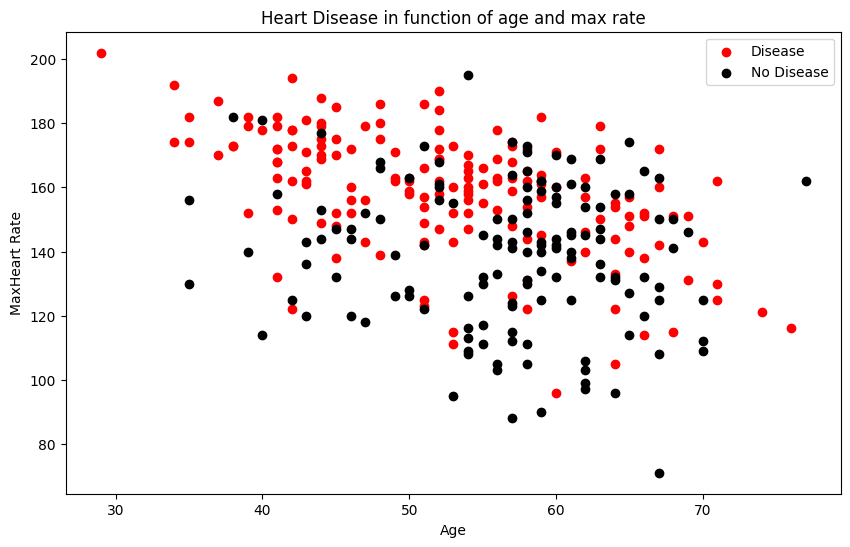

In [15]:
# Creating other figure
plt.figure(figsize=(10,6))

#scatter with positive examples 
plt.scatter(df.age[df.target == 1], df.thalach[df.target==1],
            c ="red");

#scatter with negative examples 
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="black")

#Add some helpful info 
plt.title("Heart Disease in function of age and max rate")
plt.xlabel("Age")
plt.ylabel("MaxHeart Rate")
plt.legend(["Disease","No Disease"])

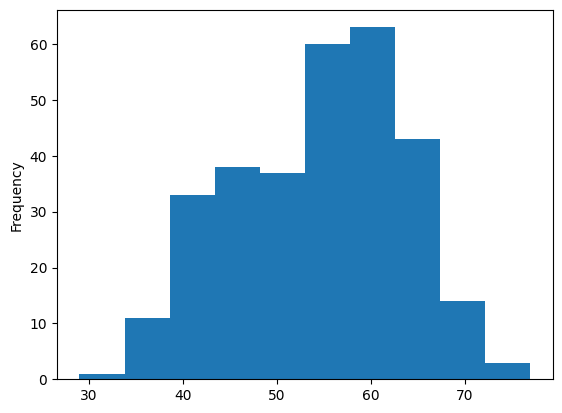

In [16]:
#check the distribution of age column with histogram
df.age.plot.hist();

### heart disease frequency per chest pain
### cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


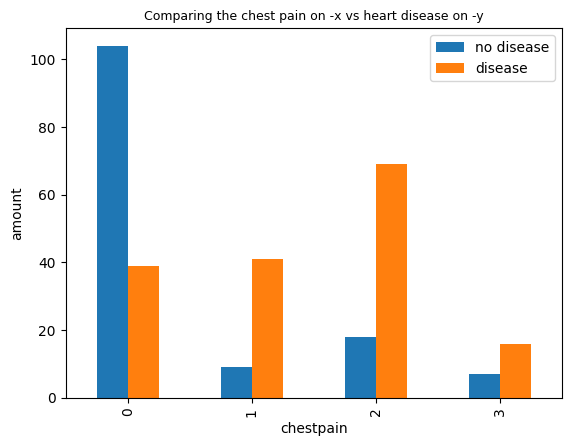

In [18]:
pd.crosstab(df.cp, df.target).plot(kind ="bar")
plt.legend(["no disease","disease"])
plt.title("Comparing the chest pain on -x vs heart disease on -y",fontsize = 9)
plt.xlabel("chestpain")
plt.ylabel("amount");

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


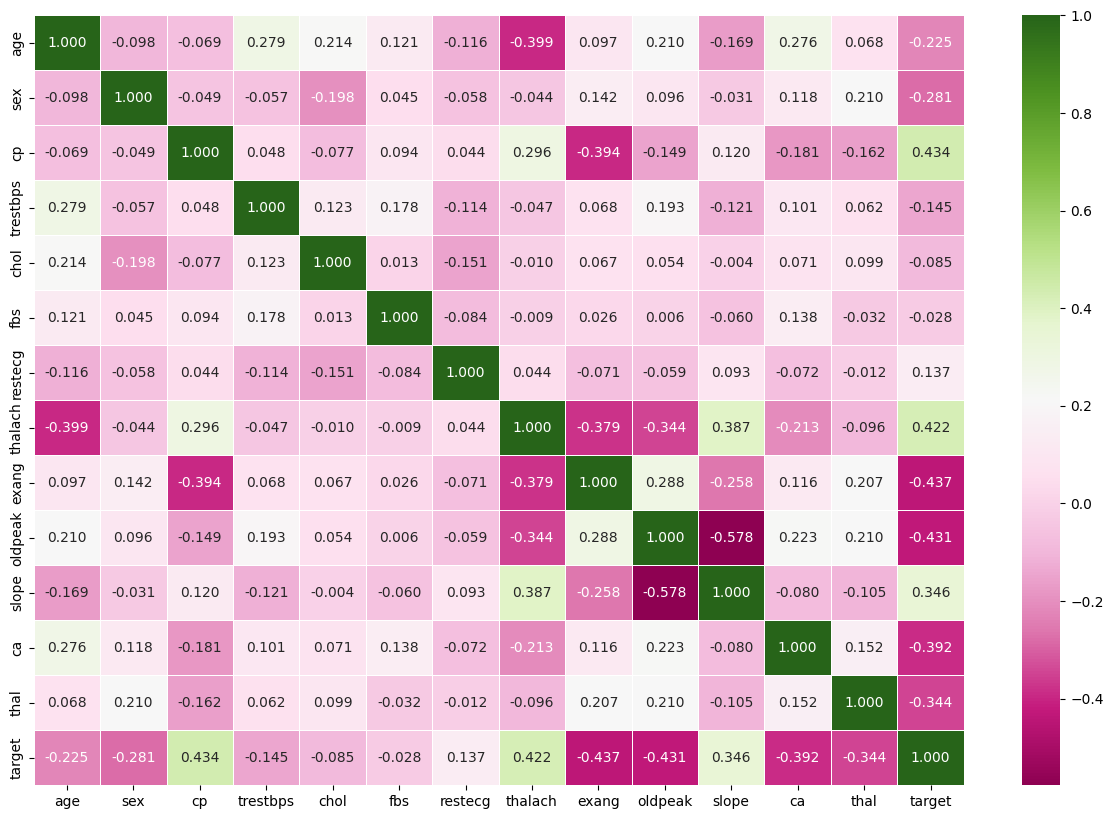

In [21]:
#lest make it more visual
corr_mat = df.corr()
fig,axis = plt.subplots(figsize = (15,10))
axis = sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt =".3f",cmap="PiYG")


### 5.modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
#split data into x and y
x = df.drop(["target"],axis =1)
y = df["target"]

In [24]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
#split the data into train and test data
np.random.seed(42)
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


### it's time to build a machine learning model
* we wil train it on train set
* we wil test it on test set

we're going to try three different machine learning models
* logistic Regression
* K Neighbors Classifier
* Random Forest Classifier

In [28]:
#make a dictionary of the models
from sklearn.linear_model import LogisticRegression
models = {
    "logistic regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random forest":RandomForestClassifier()
}
#create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given machine learning models
    models:dict of different scikit learn models
    x_train :training data
    x_test :test data
    vice-versa
    """
    #set random seed
    np.random.seed(42)
    #make a dictonary to make model score or to keep model scores
    model_scores ={
        
    }
    #loop through models
    for name,model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        #evaluate the model and append the score  into the model_scores dict
        model_scores[name] = model.score(x_test,y_test)
    return model_scores
    


In [29]:
model_scores = fit_and_score(models,x_train,x_test,y_train,y_test)
print(model_scores)

c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistic regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random forest': 0.8360655737704918}


#### model comparison

<Axes: >

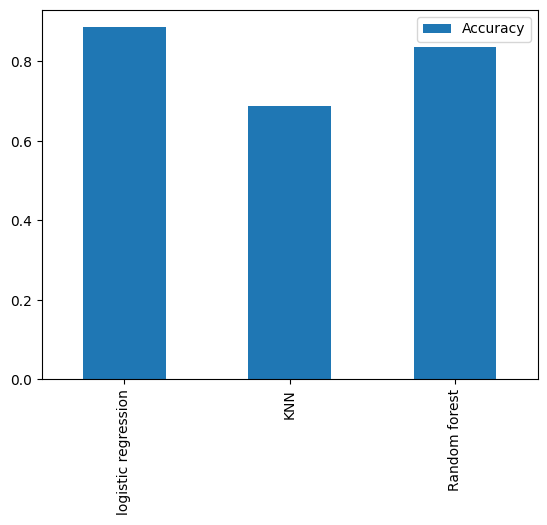

In [30]:
model_compare = pd.DataFrame(model_scores,["Accuracy"])
model_compare.T.plot.bar()

Now we have got a baseline model and we know that our model first prediction arent always  what we should we based our next steps off.what should we do?

Let's look at the following :
* hyperparameters tuning
* Feature importance
* confusion matrix
* cross validation
* precision 
* recall
* F1 score 
* classification report 
* ROC curve 
* Area under the curve 



## Hyperparameter tuning


let's tune kNN

In [31]:
train_scores = []
test_scores = []

#create  a list of different values for n neighbours
neighbour = range(1,21)
knn  = KNeighborsClassifier()

#loop through different n neighbours
for i in neighbour:
    knn.set_params(n_neighbors=i)
    
    #Fit the algorithm
    knn.fit(x_train,y_train)
    
    #update the train_scores 
    train_scores.append(knn.score(x_train,y_train))
    #update the test score list
    test_scores.append(knn.score(x_test,y_test))
    

In [32]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

maximum test score of the knn is : 75.40983606557377


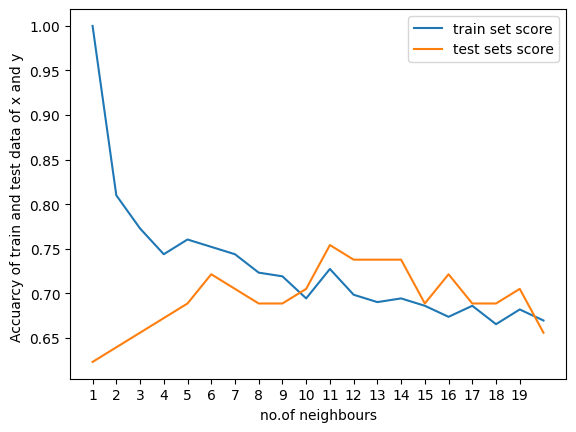

In [34]:
plt.plot(neighbour,train_scores,label="train_score")
plt.plot(neighbour,test_scores,label="test_score")
plt.xlabel("no.of neighbours")
plt.ylabel("Accuarcy of train and test data of x and y ")
plt.legend(["train set score","test sets score"])
plt.xticks(np.arange(1,20,1));
print("maximum test score of the knn is :",max(test_scores)*100)

## Hyperparameter tuning with randomized search cv

we're going to tune:
* LogisticRegression
* RandomForestClassifier..............
using RandomsearchCV

In [35]:
# create a hyperparameter grid for logisitic regression
log_reg_grid = {
    "C":np.logspace(-4,4,20),
    "solver":["liblinear"]
}
#create a grid for the randomforestclassifier
rf_grid ={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None,3,5,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
    
}

Now've have got hyperparameters grid search for each of the model let's churn them with RandomizedSearchCV

In [36]:
#Tune logistic Regression
np.random.seed(42)

#setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                                cv=5,n_iter = 20,)
#Fit random hyperparameter search for logistic regression
rs_log_reg.fit(x_train,y_train)


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now let's do the same for the RandomForestClassifier

In [39]:
#setup random seed
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions= rf_grid,cv=5,n_iter=20,verbose = 2)

rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.8s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.6s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [40]:
#Find the best parameters
rs_rf.best_params_

rs_rf.score(x_test,y_test)

0.8688524590163934

# Tuning hyperparameters with GridSearchCV


our logistic regression provides best result so far we tune it hyperparameters

In [41]:
#different hyperparameters for logistic regression
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear","saga","lbfgs"]}
gs_log_grid= GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv = 5,verbose=2)
gs_log_grid.fit(x_train,y_train)



Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END ..............................C=0.0001, solver=saga; total time=   0.0s
[CV] END ..............................C=0.0001, solver=saga; total time=   0.0s
[CV] END ..............................C=0.0001, solver=saga; total time=   0.0s
[CV] END ..............................C=0.0001, solver=saga; total time=   0.0s
[CV] END ..............................C=0.0001, solver=saga; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001,

c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END .............C=0.00018873918221350977, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.00018873918221350977, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.00018873918221350977, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.00018873918221350977, solver=lbfgs; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ...............C=0.0003562247890262444, solver=saga; total time=   0.0s
[CV] END ...............C=0.0003562247890262444, solver=saga; total time=   0.0s
[CV] END ...............C=0.0003562247890262444, solver=saga; total time=   0.0s
[CV] END ...............C=0.0003562247890262444, solver=saga; total time=   0.0s
[CV] END ...............C=0.0003562247890262444, solver=saga; total time=   0.0s
[CV] END ..............C=0.0003562247890262444, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0003562247890262444, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0003562247890262444, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0003562247890262444, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0003562247890262444, solver=lbfgs; total time=   0.0s
[CV] END ..........C=0.0006723357536499335, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0006723357536499335, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.00067

c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ...............C=0.0006723357536499335, solver=saga; total time=   0.0s
[CV] END ...............C=0.0006723357536499335, solver=saga; total time=   0.0s
[CV] END ..............C=0.0006723357536499335, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0006723357536499335, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0006723357536499335, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0006723357536499335, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0006723357536499335, solver=lbfgs; total time=   0.0s
[CV] END ..........C=0.0012689610031679222, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012689610031679222, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012689610031679222, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012689610031679222, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0012689610031679222, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.

c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ..............C=0.0012689610031679222, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0012689610031679222, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0012689610031679222, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0012689610031679222, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..............C=0.0012689610031679222, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.002395026619987486, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002395026619987486, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002395026619987486, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002395026619987486, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.002395026619987486, solver=liblinear; total time=   0.0s
[CV] END ................C=0.002395026619987486, solver=saga; total time=   0.0s
[CV] END ................C=0.002395026619987486, solver=saga; total time=   0.0s
[CV] END ................C=0.002395026619987486, solver=saga; total time=   0.0s
[CV] END ................C=0.002395026619987486, solver=saga; total time=   0.0s
[CV] END ................C=0.002395026619987486, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ...............C=0.002395026619987486, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.002395026619987486, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.002395026619987486, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.002395026619987486, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.002395026619987486, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s
[CV] END ................C=0.004520353656360241, solver=saga; total time=   0.0s
[CV] END ................C=0.004520353656360241, solver=saga; total time=   0.0s
[CV] END ................C=0.004520353656360241, solver=saga; total time=   0.0s
[CV] END ................C=0.004520353656360241, solver=saga; total time=   0.0s
[CV] END ................C=0.004520353656360241, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

[CV] END ...............C=0.004520353656360241, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.004520353656360241, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.004520353656360241, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.004520353656360241, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.004520353656360241, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ................C=0.008531678524172805, solver=saga; total time=   0.0s
[CV] END ................C=0.008531678524172805, solver=saga; total time=   0.0s
[CV] END ................C=0.008531678524172805, solver=saga; total time=   0.0s
[CV] END ................C=0.008531678524172805, solver=saga; total time=   0.0s
[CV] END ................C=0.008531678524172805, solver=saga; total time=   0.0s
[CV] END ...............C=0.008531678524172805, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

[CV] END ...............C=0.008531678524172805, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.008531678524172805, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.008531678524172805, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.008531678524172805, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END .................C=0.01610262027560939, solver=saga; total time=   0.0s
[CV] END .................C=0.01610262027560939, solver=saga; total time=   0.0s
[CV] END .................C=0.01610262027560939, solver=saga; total time=   0.0s
[CV] END .................C=0.01610262027560939, solver=saga; total time=   0.0s
[CV] END .................C=0.01610262027560939, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END ................C=0.01610262027560939, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.01610262027560939, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.01610262027560939, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.01610262027560939, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.01610262027560939, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END .................C=0.03039195382313198, solver=saga; total time=   0.0s
[CV] END .................C=0.03039195382313198, solver=saga; total time=   0.0s
[CV] END .................C=0.03039195382313198, solver=saga; total time=   0.0s
[CV] END .................C=0.03039195382313198, solver=saga; total time=   0.0s
[CV] END .................C=0.03039195382313198, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END ................C=0.03039195382313198, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.03039195382313198, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.03039195382313198, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.03039195382313198, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ................C=0.03039195382313198, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END .................C=0.05736152510448681, solver=saga; total time=   0.0s
[CV] END .................C=0.05736152510448681, solver=saga; total time=   0.0s
[CV] END .................C=0.05736152510448681, solver=saga; total time=   0.0s
[CV] END .................C=0.05736152510448681, solver=saga; total time=   0.0s
[CV] END .................C=0.05736152510448681, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ................C=0.05736152510448681, solver=lbfgs; total time=   0.1s
[CV] END ................C=0.05736152510448681, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.05736152510448681, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.05736152510448681, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.05736152510448681, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END ..................C=0.1082636733874054, solver=saga; total time=   0.0s
[CV] END ..................C=0.1082636733874054, solver=saga; total time=   0.0s
[CV] END ..................C=0.1082636733874054, solver=saga; total time=   0.0s
[CV] END ..................C=0.1082636733874054, solver=saga; total time=   0.0s
[CV] END ..................C=0.1082636733874054, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END .................C=0.1082636733874054, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.1082636733874054, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.1082636733874054, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.1082636733874054, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.1082636733874054, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ............C=0.20433597178569418, solver=liblinear; total time=   0.0s
[CV] END ............C=0.20433597178569418, solver=liblinear; total time=   0.0s
[CV] END ............C=0.20433597178569418, solver=liblinear; total time=   0.0s
[CV] END ............C=0.20433597178569418, solver=liblinear; total time=   0.0s
[CV] END ............C=0.20433597178569418, solver=liblinear; total time=   0.0s
[CV] END .................C=0.20433597178569418, solver=saga; total time=   0.0s
[CV] END .................C=0.20433597178569418, solver=saga; total time=   0.0s
[CV] END .................C=0.20433597178569418, solver=saga; total time=   0.0s
[CV] END .................C=0.20433597178569418, solver=saga; total time=   0.0s
[CV] END .................C=0.20433597178569418, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ................C=0.20433597178569418, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.20433597178569418, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.20433597178569418, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.20433597178569418, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.20433597178569418, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ............C=0.38566204211634725, solver=liblinear; total time=   0.0s
[CV] END ............C=0.38566204211634725, solver=liblinear; total time=   0.0s
[CV] END ............C=0.38566204211634725, solver=liblinear; total time=   0.0s
[CV] END ............C=0.38566204211634725, solver=liblinear; total time=   0.0s
[CV] END ............C=0.38566204211634725, solver=liblinear; total time=   0.0s
[CV] END .................C=0.38566204211634725, solver=saga; total time=   0.0s
[CV] END .................C=0.38566204211634725, solver=saga; total time=   0.0s
[CV] END .................C=0.38566204211634725, solver=saga; total time=   0.0s
[CV] END .................C=0.38566204211634725, solver=saga; total time=   0.0s
[CV] END .................C=0.38566204211634725, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

[CV] END ................C=0.38566204211634725, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.38566204211634725, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.38566204211634725, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.38566204211634725, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.38566204211634725, solver=lbfgs; total time=   0.0s
[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s
[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s
[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s
[CV] END .............C=0.7278953843983146, solver=liblinear; total time=   0.0s
[CV] END ..................C=0.7278953843983146, solver=saga; total time=   0.0s
[CV] END ..................C=0.7278953843983146, solver=saga; total time=   0.0s
[CV] END ..................C=0.7278953843983146, solver=saga; total time=   0.0s
[CV] END ..................C=0.7278953843983146, solver=saga; total time=   0.0s
[CV] END ..................C=0.7278953843983146, solver=saga; total time=   0.0s
[CV] END .................C=0.7278953843983146, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

[CV] END .................C=0.7278953843983146, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.7278953843983146, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.7278953843983146, solver=lbfgs; total time=   0.0s
[CV] END .................C=0.7278953843983146, solver=lbfgs; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END ..................C=1.3738237958832638, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END ..................C=1.3738237958832638, solver=saga; total time=   0.0s
[CV] END ..................C=1.3738237958832638, solver=saga; total time=   0.0s
[CV] END ..................C=1.3738237958832638, solver=saga; total time=   0.0s
[CV] END ..................C=1.3738237958832638, solver=saga; total time=   0.0s
[CV] END .................C=1.3738237958832638, solver=lbfgs; total time=   0.0s
[CV] END .................C=1.3738237958832638, solver=lbfgs; total time=   0.0s
[CV] END .................C=1.3738237958832638, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .................C=1.3738237958832638, solver=lbfgs; total time=   0.0s
[CV] END .................C=1.3738237958832638, solver=lbfgs; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ...................C=2.592943797404667, solver=saga; total time=   0.0s
[CV] END ...................C=2.592943797404667, solver=saga; total time=   0.0s
[CV] END ...................C=2.592943797404667, solver=saga; total time=   0.0s
[CV] END ...................C=2.592943797404667, solver=saga; total time=   0.0s
[CV] END ...................C=2.592943797404667, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):

[CV] END ..................C=2.592943797404667, solver=lbfgs; total time=   0.0s
[CV] END ..................C=2.592943797404667, solver=lbfgs; total time=   0.0s
[CV] END ..................C=2.592943797404667, solver=lbfgs; total time=   0.0s
[CV] END ..................C=2.592943797404667, solver=lbfgs; total time=   0.0s
[CV] END ..................C=2.592943797404667, solver=lbfgs; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ...................C=4.893900918477489, solver=saga; total time=   0.0s
[CV] END ...................C=4.893900918477489, solver=saga; total time=   0.0s
[CV] END ...................C=4.893900918477489, solver=saga; total time=   0.0s
[CV] END ...................C=4.893900918477489, solver=saga; total time=   0.0s
[CV] END ...................C=4.893900918477489, solver=saga; total time=   0.0s
[CV] END ..................C=4.893900918477489, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

[CV] END ..................C=4.893900918477489, solver=lbfgs; total time=   0.0s
[CV] END ..................C=4.893900918477489, solver=lbfgs; total time=   0.0s
[CV] END ..................C=4.893900918477489, solver=lbfgs; total time=   0.0s
[CV] END ..................C=4.893900918477489, solver=lbfgs; total time=   0.0s
[CV] END ..............C=9.236708571873866, solver=liblinear; total time=   0.0s
[CV] END ..............C=9.236708571873866, solver=liblinear; total time=   0.0s
[CV] END ..............C=9.236708571873866, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..............C=9.236708571873866, solver=liblinear; total time=   0.0s
[CV] END ..............C=9.236708571873866, solver=liblinear; total time=   0.0s
[CV] END ...................C=9.236708571873866, solver=saga; total time=   0.0s
[CV] END ...................C=9.236708571873866, solver=saga; total time=   0.0s
[CV] END ...................C=9.236708571873866, solver=saga; total time=   0.0s
[CV] END ...................C=9.236708571873866, solver=saga; total time=   0.0s
[CV] END ...................C=9.236708571873866, solver=saga; total time=   0.0s
[CV] END ..................C=9.236708571873866, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END ..................C=9.236708571873866, solver=lbfgs; total time=   0.0s
[CV] END ..................C=9.236708571873866, solver=lbfgs; total time=   0.0s
[CV] END ..................C=9.236708571873866, solver=lbfgs; total time=   0.0s
[CV] END ..................C=9.236708571873866, solver=lbfgs; total time=   0.0s
[CV] END .............C=17.433288221999874, solver=liblinear; total time=   0.0s
[CV] END .............C=17.433288221999874, solver=liblinear; total time=   0.0s
[CV] END .............C=17.433288221999874, solver=liblinear; total time=   0.0s
[CV] END .............C=17.433288221999874, solver=liblinear; total time=   0.0s
[CV] END .............C=17.433288221999874, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..................C=17.433288221999874, solver=saga; total time=   0.0s
[CV] END ..................C=17.433288221999874, solver=saga; total time=   0.0s
[CV] END ..................C=17.433288221999874, solver=saga; total time=   0.0s
[CV] END ..................C=17.433288221999874, solver=saga; total time=   0.0s
[CV] END ..................C=17.433288221999874, solver=saga; total time=   0.0s
[CV] END .................C=17.433288221999874, solver=lbfgs; total time=   0.0s
[CV] END .................C=17.433288221999874, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

[CV] END .................C=17.433288221999874, solver=lbfgs; total time=   0.0s
[CV] END .................C=17.433288221999874, solver=lbfgs; total time=   0.0s
[CV] END .................C=17.433288221999874, solver=lbfgs; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ...................C=32.90344562312671, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END ...................C=32.90344562312671, solver=saga; total time=   0.0s
[CV] END ...................C=32.90344562312671, solver=saga; total time=   0.0s
[CV] END ...................C=32.90344562312671, solver=saga; total time=   0.0s
[CV] END ...................C=32.90344562312671, solver=saga; total time=   0.0s
[CV] END ..................C=32.90344562312671, solver=lbfgs; total time=   0.0s
[CV] END ..................C=32.90344562312671, solver=lbfgs; total time=   0.0s
[CV] END ..................C=32.90344562312671, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..................C=32.90344562312671, solver=lbfgs; total time=   0.0s
[CV] END ..................C=32.90344562312671, solver=lbfgs; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ...................C=62.10169418915616, solver=saga; total time=   0.0s
[CV] END ...................C=62.10169418915616, solver=saga; total time=   0.0s
[CV] END ...................C=62.10169418915616, solver=saga; total time=   0.0s
[CV] END ...................C=62.10169418915616, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ...................C=62.10169418915616, solver=saga; total time=   0.0s
[CV] END ..................C=62.10169418915616, solver=lbfgs; total time=   0.0s
[CV] END ..................C=62.10169418915616, solver=lbfgs; total time=   0.0s
[CV] END ..................C=62.10169418915616, solver=lbfgs; total time=   0.0s
[CV] END ..................C=62.10169418915616, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..................C=62.10169418915616, solver=lbfgs; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END ..................C=117.21022975334793, solver=saga; total time=   0.0s
[CV] END ..................C=117.21022975334793, solver=saga; total time=   0.0s
[CV] END ..................C=117.21022975334793, solver=saga; total time=   0.0s
[CV] END ..................C=117.21022975334793, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END ..................C=117.21022975334793, solver=saga; total time=   0.0s
[CV] END .................C=117.21022975334793, solver=lbfgs; total time=   0.0s
[CV] END .................C=117.21022975334793, solver=lbfgs; total time=   0.0s
[CV] END .................C=117.21022975334793, solver=lbfgs; total time=   0.0s
[CV] END .................C=117.21022975334793, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .................C=117.21022975334793, solver=lbfgs; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END ..................C=221.22162910704503, solver=saga; total time=   0.0s
[CV] END ..................C=221.22162910704503, solver=saga; total time=   0.0s
[CV] END ..................C=221.22162910704503, solver=saga; total time=   0.0s
[CV] END ..................C=221.22162910704503, solver=saga; total time=   0.0s
[CV] END ..................C=221.22162910704503, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to t

[CV] END .................C=221.22162910704503, solver=lbfgs; total time=   0.0s
[CV] END .................C=221.22162910704503, solver=lbfgs; total time=   0.0s
[CV] END .................C=221.22162910704503, solver=lbfgs; total time=   0.0s
[CV] END .................C=221.22162910704503, solver=lbfgs; total time=   0.0s
[CV] END .................C=221.22162910704503, solver=lbfgs; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END ..................C=417.53189365604004, solver=saga; total time=   0.0s
[CV] END ..................C=417.53189365604004, solver=saga; total time=   0.0s
[CV] END ..................C=417.53189365604004, solver=saga; total time=   0.0s
[CV] END ..................C=417.53189365604004, solver=saga; total time=   0.0s
[CV] END ..................C=417.53189365604004, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

[CV] END .................C=417.53189365604004, solver=lbfgs; total time=   0.0s
[CV] END .................C=417.53189365604004, solver=lbfgs; total time=   0.0s
[CV] END .................C=417.53189365604004, solver=lbfgs; total time=   0.0s
[CV] END .................C=417.53189365604004, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END .................C=417.53189365604004, solver=lbfgs; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ...................C=788.0462815669904, solver=saga; total time=   0.0s
[CV] END ...................C=788.0462815669904, solver=saga; total time=   0.0s
[CV] END ...................C=788.0462815669904, solver=saga; total time=   0.0s
[CV] END ...................C=788.0462815669904, solver=saga; total time=   0.0s
[CV] END ...................C=788.0462815669904, solver=saga; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..................C=788.0462815669904, solver=lbfgs; total time=   0.0s
[CV] END ..................C=788.0462815669904, solver=lbfgs; total time=   0.0s
[CV] END ..................C=788.0462815669904, solver=lbfgs; total time=   0.0s
[CV] END ..................C=788.0462815669904, solver=lbfgs; total time=   0.0s
[CV] END ..................C=788.0462815669904, solver=lbfgs; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END ..................C=1487.3521072935118, solver=saga; total time=   0.0s
[CV] END ..................C=1487.3521072935118, solver=saga; total time=   0.0s
[CV] END ..................C

c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the 

[CV] END .................C=1487.3521072935118, solver=lbfgs; total time=   0.0s
[CV] END .................C=1487.3521072935118, solver=lbfgs; total time=   0.0s
[CV] END .................C=1487.3521072935118, solver=lbfgs; total time=   0.0s
[CV] END .................C=1487.3521072935118, solver=lbfgs; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END ..................C=2807.2162039411755, solver=saga; total time=   0.0s
[CV] END ..................C=2807.2162039411755, solver=saga; total time=   0.0s
[CV] END ..................C=2807.2162039411755, solver=saga; total time=   0.0s
[CV] END ..................C=2807.2162039411755, solver=saga; total time=   0.0s
[CV] END ..................C=2807.2162039411755, solver=saga; total time=   0.0s
[CV] END .................C=2807.2162039411755, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):

[CV] END .................C=2807.2162039411755, solver=lbfgs; total time=   0.0s
[CV] END .................C=2807.2162039411755, solver=lbfgs; total time=   0.0s
[CV] END .................C=2807.2162039411755, solver=lbfgs; total time=   0.0s
[CV] END .................C=2807.2162039411755, solver=lbfgs; total time=   0.0s
[CV] END ..............C=5298.316906283702, solver=liblinear; total time=   0.0s
[CV] END ..............C=5298.316906283702, solver=liblinear; total time=   0.0s
[CV] END ..............C=5298.316906283702, solver=liblinear; total time=   0.0s
[CV] END ..............C=5298.316906283702, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ..............C=5298.316906283702, solver=liblinear; total time=   0.0s
[CV] END ...................C=5298.316906283702, solver=saga; total time=   0.0s
[CV] END ...................C=5298.316906283702, solver=saga; total time=   0.0s
[CV] END ...................C=5298.316906283702, solver=saga; total time=   0.0s
[CV] END ...................C=5298.316906283702, solver=saga; total time=   0.0s
[CV] END ...................C=5298.316906283702, solver=saga; total time=   0.0s
[CV] END ..................C=5298.316906283702, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations

[CV] END ..................C=5298.316906283702, solver=lbfgs; total time=   0.0s
[CV] END ..................C=5298.316906283702, solver=lbfgs; total time=   0.0s
[CV] END ..................C=5298.316906283702, solver=lbfgs; total time=   0.0s
[CV] END ..................C=5298.316906283702, solver=lbfgs; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\bharg\AppData\Local\Programs\Py

[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END ........................C=10000.0, solver=liblinear; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END .............................C=10000.0, solver=saga; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s


c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\bharg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s
[CV] END ............................C=10000.0, solver=lbfgs; total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'saga', 'lbfgs']},
             verbose=2)

In [42]:
gs_log_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
gs_log_grid.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier,beyond accuracy
* ROC curve and AUC curve 
* Confusion matrix 
* Classification report 
* precision
* Recall 
* F1 score <div>
 and it would be better to use cross -validation where needed..........

In [44]:
#make predictons with tuned model
y_preds = gs_log_grid.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [45]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

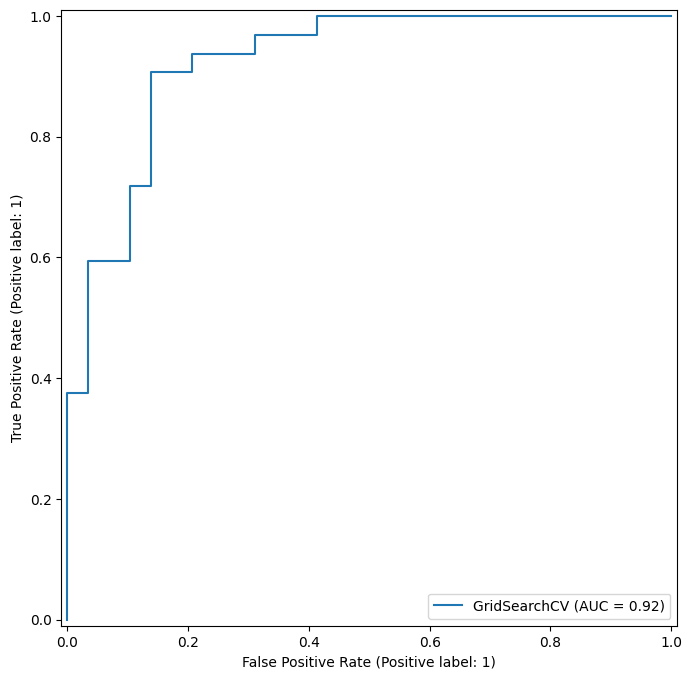

In [46]:
#import ROC curve from the function from sklearn.metrics
#plot roc curve and also plot auc curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Create a figure and a set of subplots
# figsize=(width, height) in inches
fig, ax = plt.subplots(figsize=(10, 8))

# 2. Pass the axes object 'ax' to the function
RocCurveDisplay.from_estimator(
    gs_log_grid,
    x_test,
    y_test,
    ax=ax  # This is the key part
)

# Display the plot
plt.show()

In [47]:
#confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


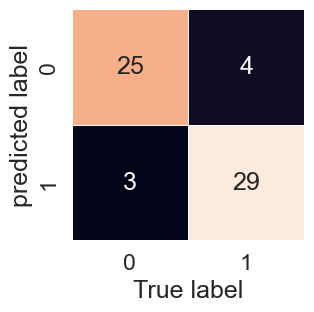

In [48]:
#import seaborn from that use heat map
sns.set(font_scale=1.5)
def confusion_matrix_fun(y_test,y_preds):
    """_summary_
    plots a nice looking confusion matrix using the heat map in the seaborn
    Args:
        y_test :test labels
        y_preds :predicted labels
    """
    fig,axs = plt.subplots(figsize =(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, cbar=False, linewidths=0.5)
    plt.xlabel("True label")
    plt.ylabel("predicted label")

confusion_matrix_fun(y_test,y_preds)

now we have got an ROC curve ,an AUC metirc and confusion_matrix 
let's get a classification report  as welll as cross validated precision,recall  and f1 score

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metric using cross validation
we are going to calculate precision,recall,f1 scrore and accuracy of the model using cross validaton to do so we are using cross val score

In [50]:
#check best hyper parameters
gs_log_grid.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [51]:
#create  a new classifier 
clf = LogisticRegression(C=0.20433597178569418,solver='liblinear')


In [52]:
#cross validated accuracy
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [53]:

cv_mean_acc =np.mean(cv_acc)
cv_mean_acc

0.8479781420765027

In [54]:
# cross validated precision
cv_prec = cross_val_score(clf,x,y,scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [55]:
cv_mean_prec=np.mean(cv_prec)
cv_mean_prec

0.8215873015873015

In [56]:
#cross validated recall
cv_recall = cross_val_score(clf, x, y, scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [57]:
cv_mean_recall= np.mean(cv_recall)
cv_mean_recall

0.9272727272727274

In [58]:
#cross validated f1 score
cv_f1 = cross_val_score(clf, x, y, scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [59]:
cv_mean_f1 = np.mean(cv_f1)
cv_mean_f1

0.8705403543192143

In [60]:
#visualize our cross validated metric
cv_df = pd.DataFrame({
    "Accuracy":cv_mean_acc,
    "Precision":cv_mean_prec,
    "Recall":cv_mean_recall,
    "f1 score":cv_mean_f1
},index=[0])

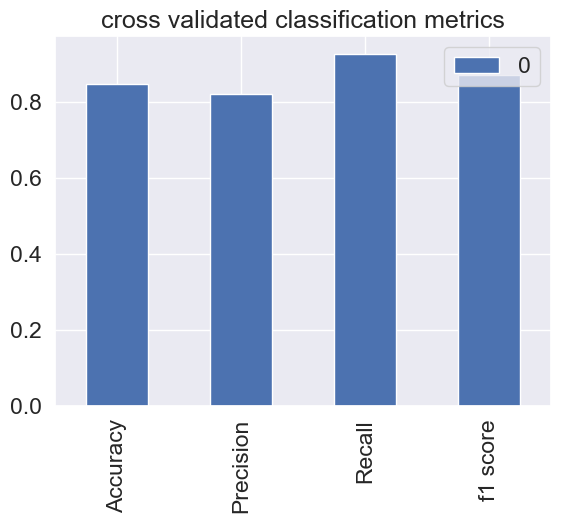

In [61]:
cv_df.T.plot.bar(title="cross validated classification metrics");

# Feature Importance

Feature importance is other way of asking, "which features contributed most to the outcomes of the model? and how did they contribute" 

finding feature importance is different for each ml model


let's find feature importance for our logistic regression

In [62]:
#fit an instance of logistic regression
gs_log_grid.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [63]:
clf1 =LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf1.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [65]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
#check coef_
clf1.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [70]:
#Match of coef of features to columns
feature_dict = dict(zip(df.columns,list(clf1.coef_[0]*100)))
feature_dict

{'age': 0.32076873709286025,
 'sex': -86.06204735539112,
 'cp': 66.00143086174384,
 'trestbps': -1.1559706419574889,
 'chol': -0.16649609500147372,
 'fbs': 4.017238940156104,
 'restecg': 31.60340177157746,
 'thalach': 2.458922261936637,
 'exang': -60.470170322810766,
 'oldpeak': -56.7954572983317,
 'slope': 45.08539117301764,
 'ca': -63.73332602422034,
 'thal': -67.55508982355707}

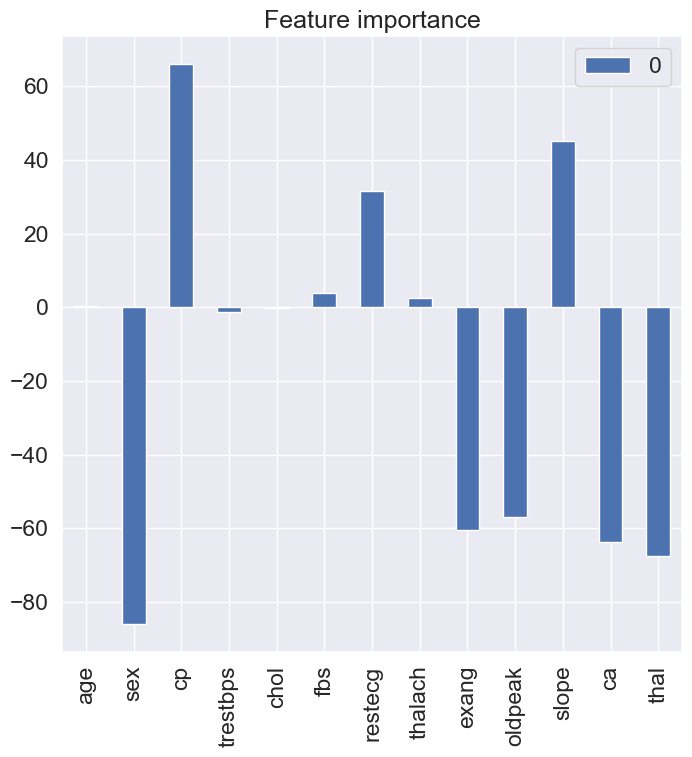

In [76]:
#visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])

fig, ax = plt.subplots(figsize=(8, 8))
feature_df.T.plot.bar(title="Feature importance", ax=ax)

plt.show()

In [77]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [78]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
